In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df_raw = pd.read_csv("./player-data-full.csv")
df_raw.head()

C:\Users\tomas\AppData\Local\Temp\ipykernel_24528\1018638222.py:1: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("./player-data-full.csv")


,player_id,version,name,full_name,description,image,height_cm,weight_kg,dob,positions,...,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,play_styles
0,239085,2024-07-08,Erling Haaland,Erling Braut Haaland,"Erling Haaland (Erling Braut Haaland, born 21 ...",https://cdn.sofifa.net/players/239/085/24_120.png,195,94,2000-07-21,ST,...,87,38,47,29,7,14,13,11,7.0,"Acrobatic +,Power Header,Quick Step"
1,231747,2024-07-08,Kylian Mbappé,Kylian Mbappé Lottin,"Kylian Mbappé (Kylian Mbappé Lottin, born 20 D...",https://cdn.sofifa.net/players/231/747/24_120.png,182,75,1998-12-20,"ST,LW",...,88,26,34,32,13,5,7,11,6.0,"Quick Step +,Finesse Shot,Rapid,Flair,Trivela,..."
2,192985,2024-07-08,Kevin De Bruyne,Kevin De Bruyne,Kevin De Bruyne (born 28 June 1991) is a Belgi...,https://cdn.sofifa.net/players/192/985/24_120.png,181,75,1991-06-28,"CM,CAM",...,88,66,70,53,15,13,5,10,13.0,"Incisive Pass +,Dead Ball,Pinged Pass,Long Bal..."
3,231866,2024-07-08,Rodri,Rodrigo Hernández Cascante,Rodri (born 22 June 1996) is a Spanish footbal...,https://cdn.sofifa.net/players/231/866/24_120.png,191,82,1996-06-22,"CDM,CM",...,90,92,87,78,10,10,7,14,8.0,"Power Shot +,Long Ball Pass,Bruiser,Aerial,Lon..."
4,202126,2024-07-08,Harry Kane,Harry Kane,Harry Kane (born 28 July 1993) is a British fo...,https://cdn.sofifa.net/players/202/126/24_120.png,188,85,1993-07-28,ST,...,92,46,46,38,8,10,11,14,11.0,"Incisive Pass +,Long Ball Pass,First Touch,Tri..."


In [3]:
def inspeccionar(df: pd.DataFrame) -> pd.DataFrame:
    # print("Dimensiones del DataFrame:", df.shape)
    # print("Tipos de datos:\n", df.dtypes)
    # print("Columnas con valores nulos:\n", df.columns[df.isnull().any()])
    return df

In [4]:
def calcular_edad(df: pd.DataFrame) -> pd.DataFrame:
    df['dob'] = pd.to_datetime(df['dob'])
    df['age'] = (pd.to_datetime('2025-07-16') - df['dob']).dt.days // 365
    return df


In [5]:
print(df_raw.columns)

Index(['player_id', 'version', 'name', 'full_name', 'description', 'image',
       'height_cm', 'weight_kg', 'dob', 'positions', 'overall_rating',
       'potential', 'value', 'wage', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'real_face', 'release_clause', 'specialities', 'club_id', 'club_name',
       'club_league_id', 'club_league_name', 'club_logo', 'club_rating',
       'club_position', 'club_kit_number', 'club_joined',
       'club_contract_valid_until', 'country_id', 'country_name',
       'country_league_id', 'country_league_name', 'country_flag',
       'country_rating', 'country_position', 'country_kit_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
       'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance',
       'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
 

In [6]:

def eliminar_columnas_innecesarias(df: pd.DataFrame) -> pd.DataFrame:
    to_drop = ['version', 'description', 'image',\
       'club_id', 'club_league_id','club_logo',\
       'club_kit_number','country_id','country_league_id', 'country_flag']
    
    return df.drop(columns=to_drop, errors='ignore')


In [7]:
def tratar_nulos(df: pd.DataFrame) -> pd.DataFrame:
    # Make a copy to avoid SettingWithCopyWarning
    df = df.copy()
    
    columnas_clave = ['club_name', 'club_league_name', 'positions']
    df = df.dropna(subset=columnas_clave)
    
    
    df['release_clause'] = df['release_clause'].fillna(0)
    
    # TODO: Validate threshold
    threshold = len(df) * 0.5
    df = df.dropna(axis=1, thresh=threshold)
    
    return df


In [8]:
def parse_monetary_string(monetary_str: str) -> float:
    if pd.isna(monetary_str) or monetary_str == '':
        return 0.0
    
    # Remove € symbol
    value_str = str(monetary_str).replace('€', '')
    
    # Check if it ends with K or M
    if value_str.endswith('K'):
        # Remove K and multiply by 1000
        number = float(value_str[:-1])
        return number * 1000
    elif value_str.endswith('M'):
        # Remove M and multiply by 1000000
        number = float(value_str[:-1])
        return number * 1000000
    else:
        # If no K or M, assume it's already in the base unit
        return float(value_str)

def convertir_salarios_y_valores(df: pd.DataFrame) -> pd.DataFrame:
    # Parse monetary columns
    df['value_eur'] = df['value'].apply(parse_monetary_string)
    df['wage_eur'] = df['wage'].apply(parse_monetary_string)
    df['release_clause_eur'] = df['release_clause'].apply(parse_monetary_string)
    
    return df


In [9]:
def convertir_tipos(df: pd.DataFrame) -> pd.DataFrame:
    
    df['value_eur'] = df['value_eur'].astype(float)
    df['wage_eur'] = df['wage_eur'].astype(float)
    df['release_clause_eur'] = df['release_clause_eur'].astype(float)
    return df


In [10]:
def agregar_columnas_utiles(df: pd.DataFrame) -> pd.DataFrame:
    df['grupo_edad'] = pd.cut(
        df['age'], 
        bins=[0, 21, 27, 33, 51], 
        labels=['joven', 'maduro', 'experimentado', 'veterano'], 
        right=False
    )
    
    df['es_promesa'] = ((df['age'] <= 21) & (df['potential'] >= 80)).astype(int)
    return df


In [11]:
def procesar_posiciones(df: pd.DataFrame) -> pd.DataFrame:
    
    df['posicion_principal'] = df['positions'].str.split(',').str[0]
    
    posicion_mapping = {
        'GK': 'Arquero',
        'CB': 'Defensor central',
        'RB': 'Lateral',
        'LB': 'Lateral',
        'RWB': 'Lateral',
        'LWB': 'Lateral',
        'CDM': 'Volante defensivo',
        'CM': 'Volante',
        'CAM': 'Volante',
        'RM': 'Volante',
        'LM': 'Volante',
        'ST': 'Delantero',
        'CF': 'Delantero',
        'RW': 'Extremo',
        'LW': 'Extremo'
    }
    
    df['posicion_simplificada'] = df['posicion_principal'].map(posicion_mapping)
    
    return df


In [12]:
def verificar_final(df: pd.DataFrame) -> pd.DataFrame:
    # print("Forma final del DataFrame:", df.shape)
    # print("\nColumnas con valores nulos:")
    nulos = df.isnull().sum()
    columnas_con_nulos = nulos[nulos > 0]
    
    # if len(columnas_con_nulos) == 0:
    #     print("No hay columnas con valores nulos")
    # else:
    #     for columna, cantidad in columnas_con_nulos.items():
    #         print(f"  {columna}: {cantidad} valores nulos")
    return df

In [13]:
df = (
    df_raw
    .pipe(inspeccionar)
    .pipe(calcular_edad)
    .pipe(eliminar_columnas_innecesarias)
    .pipe(tratar_nulos)
    .pipe(convertir_salarios_y_valores)
    .pipe(convertir_tipos)
    .pipe(agregar_columnas_utiles)
    .pipe(procesar_posiciones)
    .pipe(verificar_final)
)

df.head()

,player_id,name,full_name,height_cm,weight_kg,dob,positions,overall_rating,potential,value,...,gk_reflexes,play_styles,age,value_eur,wage_eur,release_clause_eur,grupo_edad,es_promesa,posicion_principal,posicion_simplificada
0,239085,Erling Haaland,Erling Braut Haaland,195,94,2000-07-21,ST,91,94,€185M,...,7.0,"Acrobatic +,Power Header,Quick Step",25,185000000.0,340000.0,356100000.0,maduro,0,ST,Delantero
1,231747,Kylian Mbappé,Kylian Mbappé Lottin,182,75,1998-12-20,"ST,LW",91,94,€181.5M,...,6.0,"Quick Step +,Finesse Shot,Rapid,Flair,Trivela,...",26,181500000.0,230000.0,349400000.0,maduro,0,ST,Delantero
2,192985,Kevin De Bruyne,Kevin De Bruyne,181,75,1991-06-28,"CM,CAM",91,91,€103M,...,13.0,"Incisive Pass +,Dead Ball,Pinged Pass,Long Bal...",34,103000000.0,350000.0,190600000.0,veterano,0,CM,Volante
3,231866,Rodri,Rodrigo Hernández Cascante,191,82,1996-06-22,"CDM,CM",90,92,€129.5M,...,8.0,"Power Shot +,Long Ball Pass,Bruiser,Aerial,Lon...",29,129500000.0,260000.0,249300000.0,experimentado,0,CDM,Volante defensivo
4,202126,Harry Kane,Harry Kane,188,85,1993-07-28,ST,90,90,€119.5M,...,11.0,"Incisive Pass +,Long Ball Pass,First Touch,Tri...",31,119500000.0,170000.0,197200000.0,experimentado,0,ST,Delantero


# Parte 2: Análisis exploratorio guiado por hipótesis

Se plantean 6 hipótesis que toman como variable objetivo la variable `posicion_simplificada`

### Hipótesis 1
Los jugadores que tienen un valor de mercado más alto (`value_eur`), tienen `posicion_simplificada` "Delantero"

### Hipótesis 2  
Los jugadores con mayor altura (`height_cm`) tienen una `posicion_simplificada` "Delantero"

### Hipótesis 3
Los jugadores con mayor peso (`weight_kg`) tienen una `posicion_simplificada` "Defensor central"

### Hipótesis 4
Los jugadores con mayor velocidad (`sprint_speed`) tienen una `posicion_simplificada` "Extremo"

### Hipótesis 5
Los jugadores con mejor reputación internacional (`international_reputation`) tienen una `posicion_simplificada` "Volante"

### Hipótesis 6
Los jugadores con mayor resistencia (`stamina`) tienen una `posicion_simplificada` "Volante defensivo"


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Verificar las posiciones disponibles
print("Posiciones simplificadas disponibles:")
print(df['posicion_simplificada'].value_counts())
print(f"\nTotal de jugadores: {len(df)}")
print(f"Posiciones únicas: {df['posicion_simplificada'].nunique()}")


Posiciones simplificadas disponibles:
posicion_simplificada
Volante              5356
Defensor central     3329
Lateral              2940
Delantero            2649
Arquero              2071
Volante defensivo    1476
Extremo               811
Name: count, dtype: int64

Total de jugadores: 18632
Posiciones únicas: 7


### Análisis Hipótesis 4: Velocidad y Extremos

**Hipótesis**: Los jugadores con mayor velocidad (`sprint_speed`) tienen una `posicion_simplificada` "Extremo"


In [15]:
# Análisis estadístico descriptivo de velocidad por posición
velocidad_por_posicion = df.groupby('posicion_simplificada')['sprint_speed'].agg(['mean', 'median', 'std', 'count']).round(2)
print("Estadísticas de velocidad por posición:")
print(velocidad_por_posicion.sort_values('mean', ascending=False))

# Identificar los jugadores más rápidos
print(f"\nTop 10 jugadores más rápidos:")
top_rapidos = df.nlargest(10, 'sprint_speed')[['name', 'posicion_simplificada', 'sprint_speed']]
print(top_rapidos)

# Calcular porcentaje de extremos en el top 25% más rápido
percentil_75_velocidad = df['sprint_speed'].quantile(0.75)
top_25_percent_velocidad = df[df['sprint_speed'] >= percentil_75_velocidad]
porcentaje_extremos_rapidos = (top_25_percent_velocidad['posicion_simplificada'] == 'Extremo').mean() * 100

print(f"\nPorcentaje de extremos en el 25% más rápido: {porcentaje_extremos_rapidos:.1f}%")
print(f"Velocidad promedio de extremos: {df[df['posicion_simplificada'] == 'Extremo']['sprint_speed'].mean():.1f}")
print(f"Velocidad promedio general: {df['sprint_speed'].mean():.1f}")


Estadísticas de velocidad por posición:
                        mean  median    std  count
posicion_simplificada                             
Extremo                76.90    76.0   7.61    811
Lateral                73.14    73.0   7.87   2940
Delantero              70.61    72.0  10.35   2649
Volante                70.44    70.0   9.29   5356
Volante defensivo      62.15    64.0   9.47   1476
Defensor central       61.59    63.0  11.38   3329
Arquero                35.59    35.0  10.81   2071

Top 10 jugadores más rápidos:
                    name posicion_simplificada  sprint_speed
1          Kylian Mbappé             Delantero            97
379        Karim Adeyemi               Volante            96
1019  Jeremiah St. Juste      Defensor central            96
9               Vini Jr.               Extremo            95
140         Moussa Diaby               Extremo            95
208      Alphonso Davies               Lateral            95
7950      Sirlord Conteh             Delant

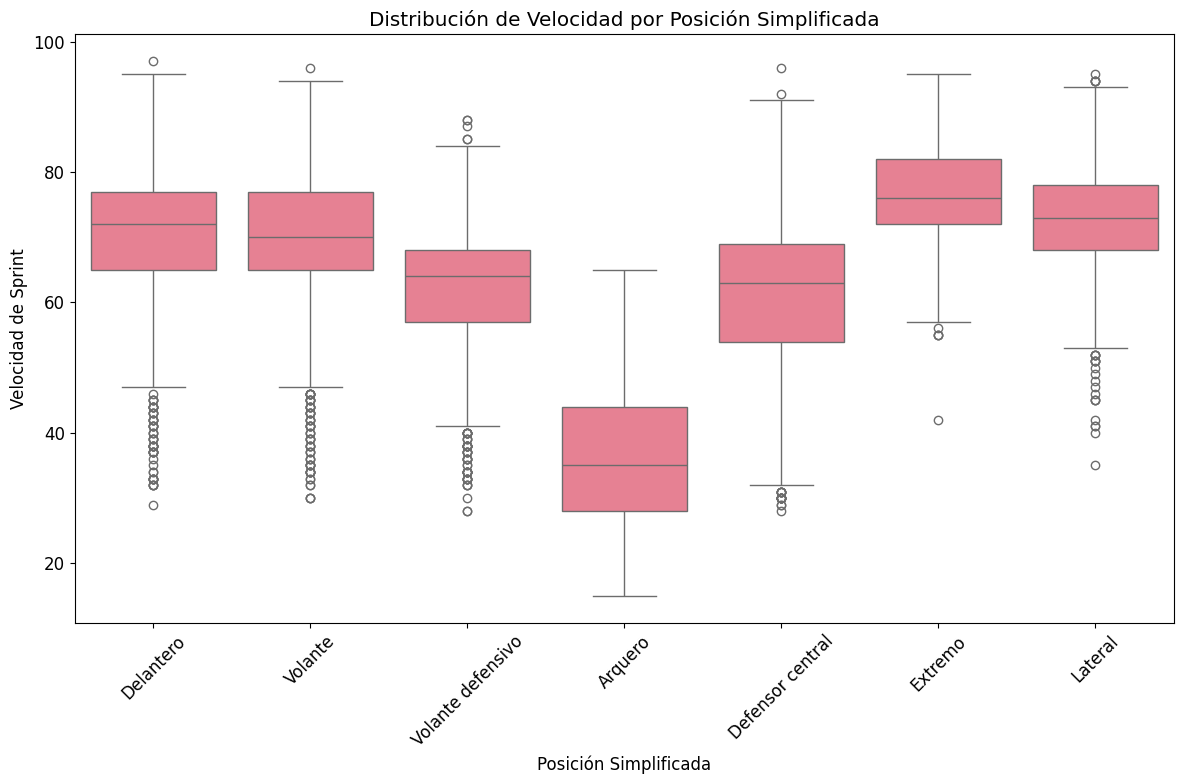

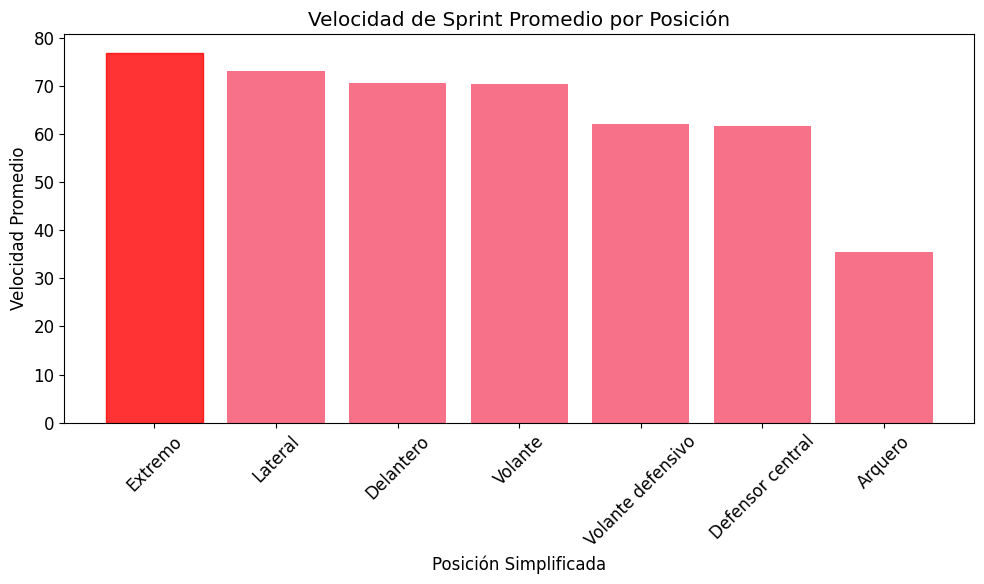

In [16]:
# Visualización: Distribución de velocidad por posición
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='posicion_simplificada', y='sprint_speed')
plt.title('Distribución de Velocidad por Posición Simplificada')
plt.xlabel('Posición Simplificada')
plt.ylabel('Velocidad de Sprint')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras con velocidad promedio
plt.figure(figsize=(10, 6))
velocidad_promedio = df.groupby('posicion_simplificada')['sprint_speed'].mean().sort_values(ascending=False)
bars = plt.bar(velocidad_promedio.index, velocidad_promedio.values)
plt.title('Velocidad de Sprint Promedio por Posición')
plt.xlabel('Posición Simplificada')
plt.ylabel('Velocidad Promedio')
plt.xticks(rotation=45)

# Resaltar la barra de Extremo
for i, bar in enumerate(bars):
    if velocidad_promedio.index[i] == 'Extremo':
        bar.set_color('red')
        bar.set_alpha(0.8)

plt.tight_layout()
plt.show()


### Análisis Hipótesis 5: Reputación Internacional y Volantes

**Hipótesis**: Los jugadores con mejor reputación internacional (`international_reputation`) tienen una `posicion_simplificada` "Volante"


In [17]:
# Análisis estadístico descriptivo de reputación internacional por posición
reputacion_por_posicion = df.groupby('posicion_simplificada')['international_reputation'].agg(['mean', 'median', 'std', 'count']).round(2)
print("Estadísticas de reputación internacional por posición:")
print(reputacion_por_posicion.sort_values('mean', ascending=False))

# Identificar los jugadores con mejor reputación internacional
print(f"\nTop 10 jugadores con mejor reputación internacional:")
top_reputacion = df.nlargest(10, 'international_reputation')[['name', 'posicion_simplificada', 'international_reputation']]
print(top_reputacion)

# Calcular porcentaje de volantes en el top de reputación internacional
top_reputacion_jugadores = df[df['international_reputation'] >= 4]  # Reputación alta (4 o 5)
porcentaje_volantes_reputacion = (top_reputacion_jugadores['posicion_simplificada'] == 'Volante').mean() * 100

print(f"\nPorcentaje de volantes con reputación internacional alta (≥4): {porcentaje_volantes_reputacion:.1f}%")
print(f"Reputación promedio de volantes: {df[df['posicion_simplificada'] == 'Volante']['international_reputation'].mean():.2f}")
print(f"Reputación promedio general: {df['international_reputation'].mean():.2f}")


Estadísticas de reputación internacional por posición:
                       mean  median   std  count
posicion_simplificada                           
Extremo                1.12     1.0  0.47    811
Delantero              1.11     1.0  0.43   2649
Defensor central       1.09     1.0  0.35   3329
Volante defensivo      1.09     1.0  0.36   1476
Arquero                1.08     1.0  0.36   2071
Volante                1.08     1.0  0.35   5356
Lateral                1.06     1.0  0.27   2940

Top 10 jugadores con mejor reputación internacional:
                  name posicion_simplificada  international_reputation
0       Erling Haaland             Delantero                         5
1        Kylian Mbappé             Delantero                         5
2      Kevin De Bruyne               Volante                         5
4           Harry Kane             Delantero                         5
5     Thibaut Courtois               Arquero                         5
6   Robert Lewandowski  

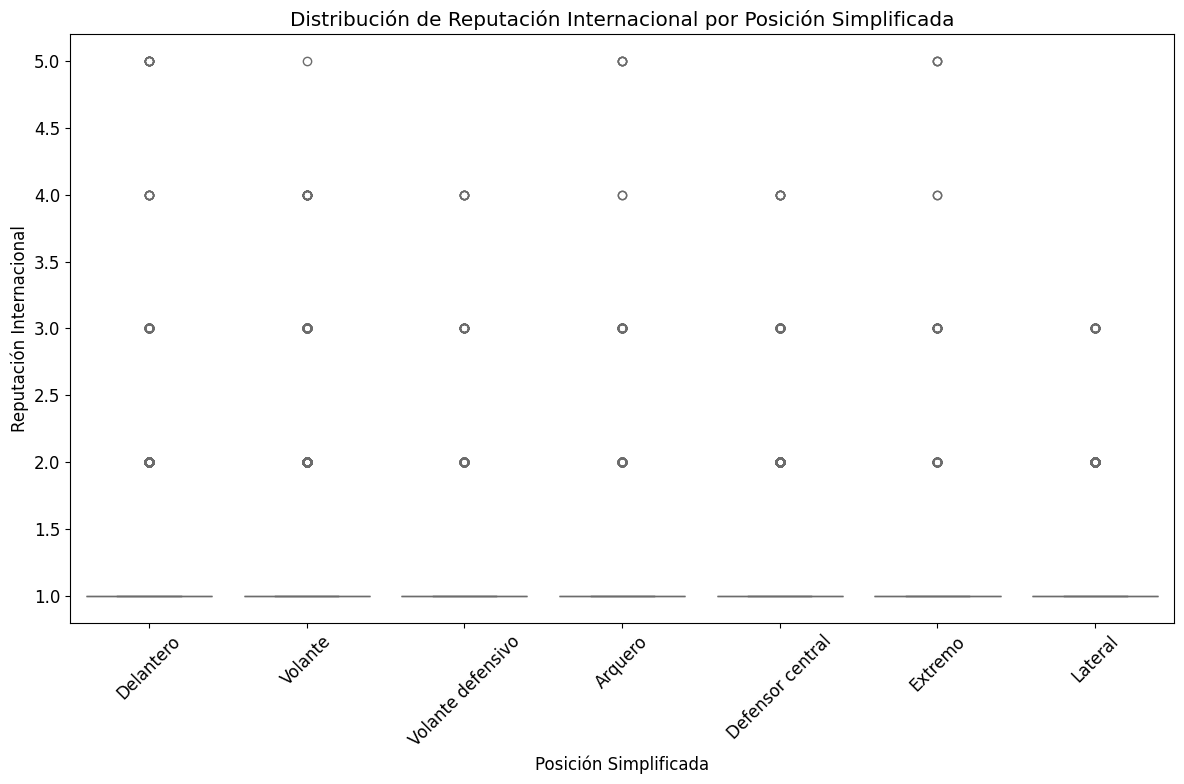

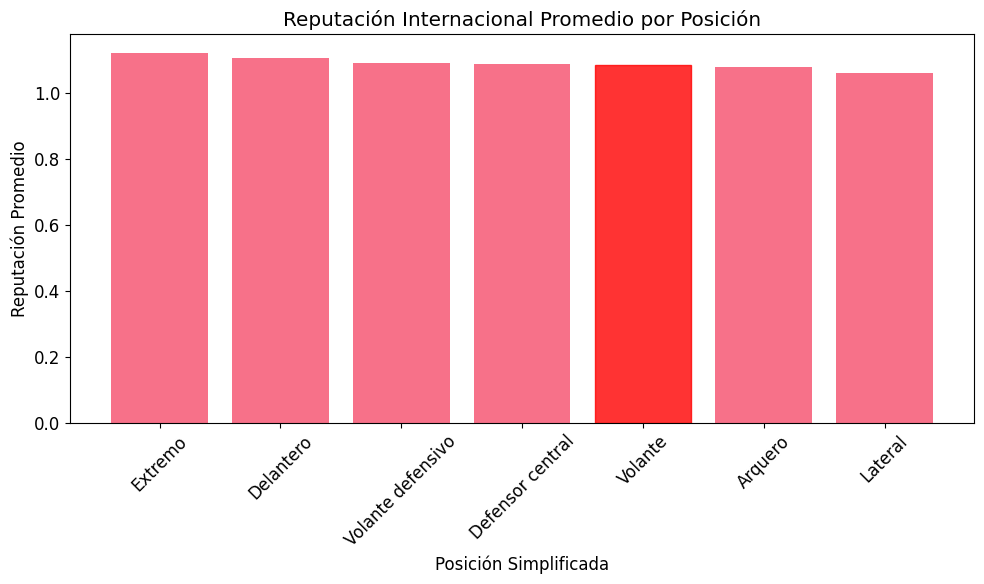

In [18]:
# Visualización: Distribución de reputación internacional por posición
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='posicion_simplificada', y='international_reputation')
plt.title('Distribución de Reputación Internacional por Posición Simplificada')
plt.xlabel('Posición Simplificada')
plt.ylabel('Reputación Internacional')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras con reputación promedio
plt.figure(figsize=(10, 6))
reputacion_promedio = df.groupby('posicion_simplificada')['international_reputation'].mean().sort_values(ascending=False)
bars = plt.bar(reputacion_promedio.index, reputacion_promedio.values)
plt.title('Reputación Internacional Promedio por Posición')
plt.xlabel('Posición Simplificada')
plt.ylabel('Reputación Promedio')
plt.xticks(rotation=45)

# Resaltar la barra de Volante
for i, bar in enumerate(bars):
    if reputacion_promedio.index[i] == 'Volante':
        bar.set_color('red')
        bar.set_alpha(0.8)

plt.tight_layout()
plt.show()


### Análisis Hipótesis 6: Resistencia y Volantes Defensivos

**Hipótesis**: Los jugadores con mayor resistencia (`stamina`) tienen una `posicion_simplificada` "Volante defensivo"


In [19]:
# Análisis estadístico descriptivo de resistencia por posición
resistencia_por_posicion = df.groupby('posicion_simplificada')['stamina'].agg(['mean', 'median', 'std', 'count']).round(2)
print("Estadísticas de resistencia por posición:")
print(resistencia_por_posicion.sort_values('mean', ascending=False))

# Identificar los jugadores con mayor resistencia
print(f"\nTop 10 jugadores con mayor resistencia:")
top_resistencia = df.nlargest(10, 'stamina')[['name', 'posicion_simplificada', 'stamina']]
print(top_resistencia)

# Calcular porcentaje de volantes defensivos en el top 25% de resistencia
percentil_75_resistencia = df['stamina'].quantile(0.75)
top_25_percent_resistencia = df[df['stamina'] >= percentil_75_resistencia]
porcentaje_volantes_def_resistencia = (top_25_percent_resistencia['posicion_simplificada'] == 'Volante defensivo').mean() * 100

print(f"\nPorcentaje de volantes defensivos en el 25% con mayor resistencia: {porcentaje_volantes_def_resistencia:.1f}%")
print(f"Resistencia promedio de volantes defensivos: {df[df['posicion_simplificada'] == 'Volante defensivo']['stamina'].mean():.1f}")
print(f"Resistencia promedio general: {df['stamina'].mean():.1f}")


Estadísticas de resistencia por posición:
                        mean  median    std  count
posicion_simplificada                             
Volante defensivo      71.99    73.0  10.60   1476
Lateral                70.86    71.0   9.27   2940
Volante                67.05    68.0  11.48   5356
Defensor central       65.40    66.0   9.32   3329
Delantero              64.35    65.0  10.08   2649
Extremo                64.01    65.0  11.54    811
Arquero                28.35    27.0   7.40   2071

Top 10 jugadores con mayor resistencia:
                  name posicion_simplificada  stamina
33     Bruno Fernandes               Volante       95
10912     Koki Hinokio               Volante       95
47      Nicolò Barella               Volante       94
252               Fred               Volante       94
815    Gustavo Cuéllar     Volante defensivo       94
921    Saud Abdulhamid               Lateral       94
1829       Dani de Wit               Volante       94
1908      Daizen Maeda    

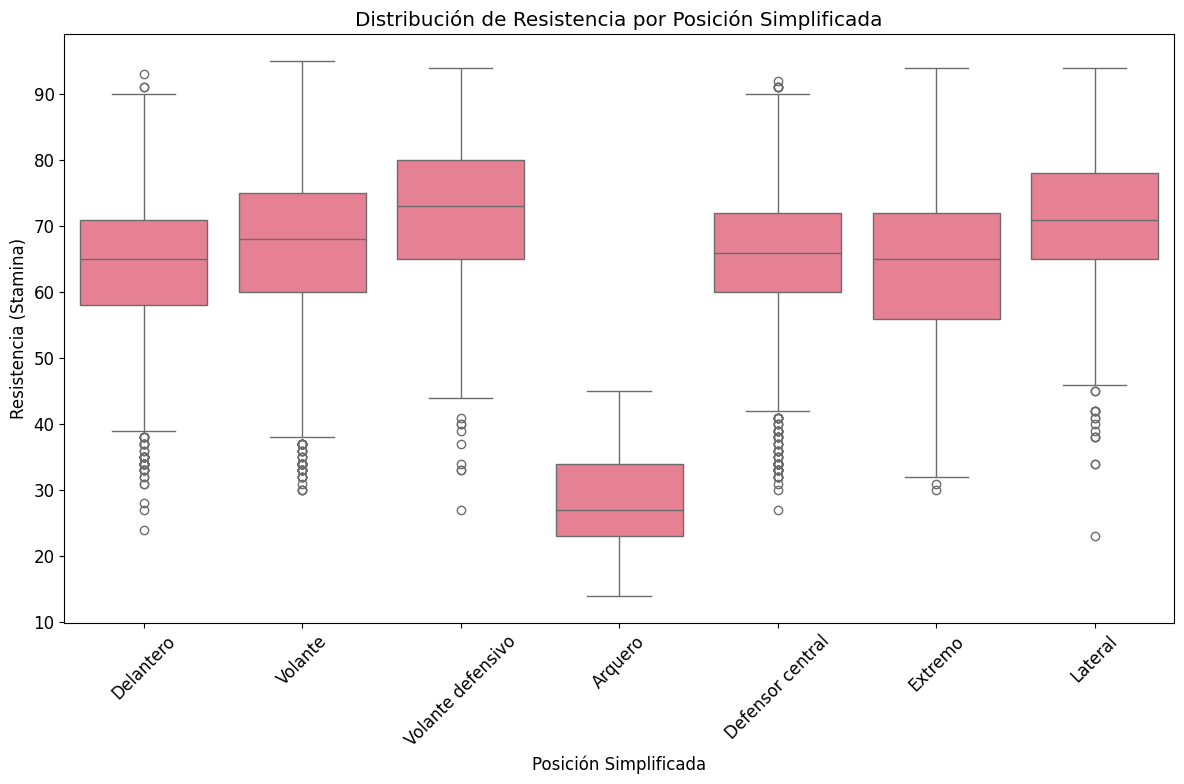

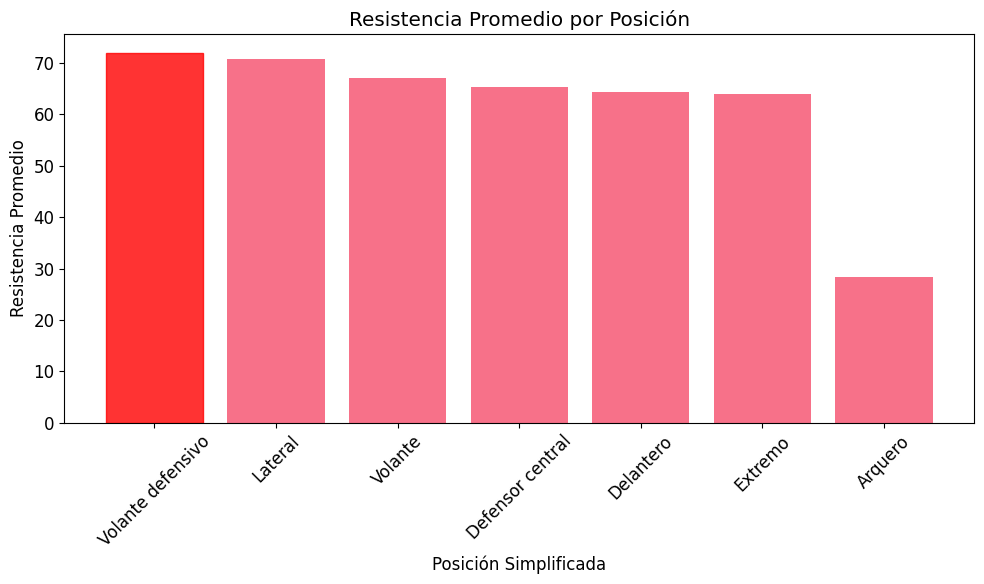

In [20]:
# Visualización: Distribución de resistencia por posición
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='posicion_simplificada', y='stamina')
plt.title('Distribución de Resistencia por Posición Simplificada')
plt.xlabel('Posición Simplificada')
plt.ylabel('Resistencia (Stamina)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de barras con resistencia promedio
plt.figure(figsize=(10, 6))
resistencia_promedio = df.groupby('posicion_simplificada')['stamina'].mean().sort_values(ascending=False)
bars = plt.bar(resistencia_promedio.index, resistencia_promedio.values)
plt.title('Resistencia Promedio por Posición')
plt.xlabel('Posición Simplificada')
plt.ylabel('Resistencia Promedio')
plt.xticks(rotation=45)

# Resaltar la barra de Volante defensivo
for i, bar in enumerate(bars):
    if resistencia_promedio.index[i] == 'Volante defensivo':
        bar.set_color('red')
        bar.set_alpha(0.8)

plt.tight_layout()
plt.show()
